In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A gift basket containes roses, chocolate and strawberries, but a gift basket is not the price of the three combined.

In [88]:
df1 = pd.read_csv('data/round3/prices_round_3_day_0.csv', delimiter=';')
df2 = pd.read_csv('data/round3/prices_round_3_day_1.csv', delimiter=';')
df3 = pd.read_csv('data/round3/prices_round_3_day_2.csv', delimiter=';')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
prices = combined_df[['product', 'mid_price']]

In [89]:
strawberry_prices = prices[prices['product'] == 'STRAWBERRIES']
rose_prices = prices[prices['product'] == 'ROSES']
chocolate_prices = prices[prices['product'] == 'CHOCOLATE']
basket_prices = prices[prices['product'] == 'GIFT_BASKET']

print(strawberry_prices)

             product  mid_price
1       STRAWBERRIES     4000.0
7       STRAWBERRIES     3999.5
11      STRAWBERRIES     3999.5
12      STRAWBERRIES     3999.5
17      STRAWBERRIES     3999.5
...              ...        ...
119983  STRAWBERRIES     3983.5
119987  STRAWBERRIES     3983.5
119988  STRAWBERRIES     3984.5
119992  STRAWBERRIES     3984.5
119998  STRAWBERRIES     3984.5

[30000 rows x 2 columns]


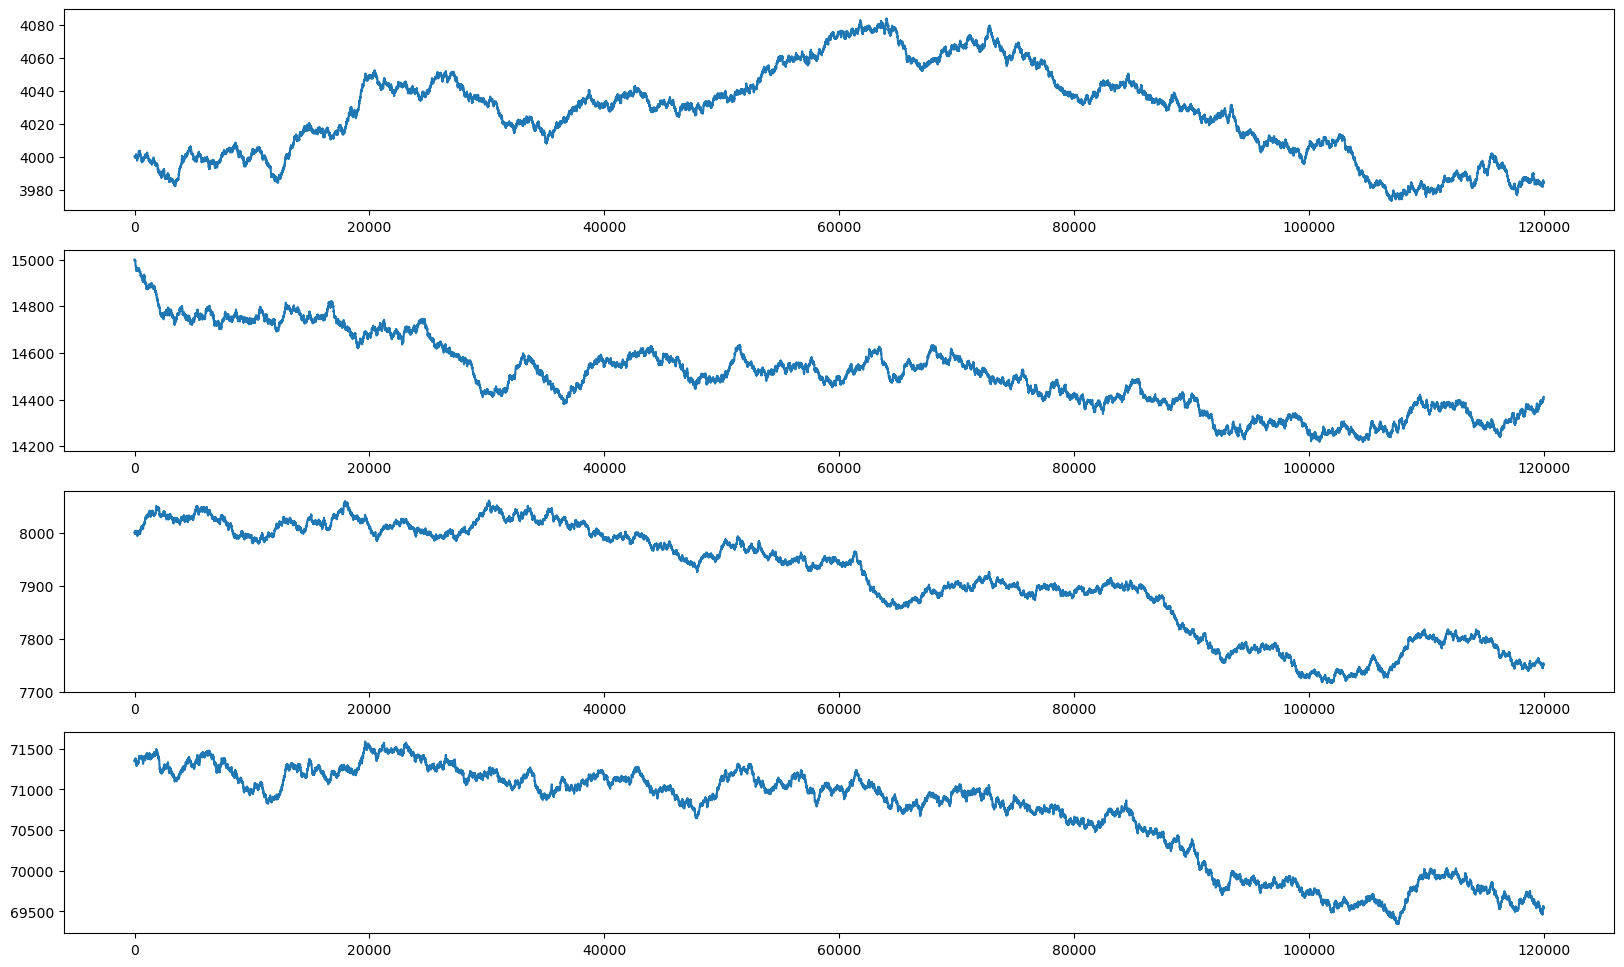

In [90]:
# plot
fig, axs = plt.subplots(4, figsize=(20, 12))

axs[0].plot(strawberry_prices['mid_price'], label='Strawberries')
axs[1].plot(rose_prices['mid_price'], label='Roses')
axs[2].plot(chocolate_prices['mid_price'], label='Chocolate')
axs[3].plot(basket_prices['mid_price'], label='Gift Basket')

In [91]:
strawberry_mid_prices = strawberry_prices['mid_price']
rose_mid_prices = rose_prices['mid_price']
chocolate_mid_prices = chocolate_prices['mid_price']
basket_mid_prices = basket_prices['mid_price']

# Create a new DataFrame with these columns
combined_prices = pd.DataFrame({
    'strawberry_mid_price': strawberry_mid_prices,
    'rose_mid_price': rose_mid_prices,
    'chocolate_mid_price': chocolate_mid_prices,
    'basket_mid_price': basket_mid_prices
})

combined_prices = combined_prices.fillna(method='ffill')

/tmp/ipykernel_2173/1248461911.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_prices = combined_prices.fillna(method='ffill')


In [92]:
def calculate_new_column(row):
    strawberry_price = row['strawberry_mid_price']
    rose_price = row['rose_mid_price']
    chocolate_price = row['chocolate_mid_price']
    basket_price = row['basket_mid_price']
    
    # Calculate the new value using the specified formula
    new_value = basket_price - (6 * strawberry_price + rose_price + 4 * chocolate_price)
    
    return new_value

# Apply the calculation function to each row in the DataFrame
combined_prices['spread'] = combined_prices.apply(calculate_new_column, axis=1)

# Fill NaN values in the new_column using the last valid value (ffill)
combined_prices['spread'] = combined_prices['spread'].fillna(method='ffill')

/tmp/ipykernel_2173/836623426.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_prices['spread'] = combined_prices['spread'].fillna(method='ffill')


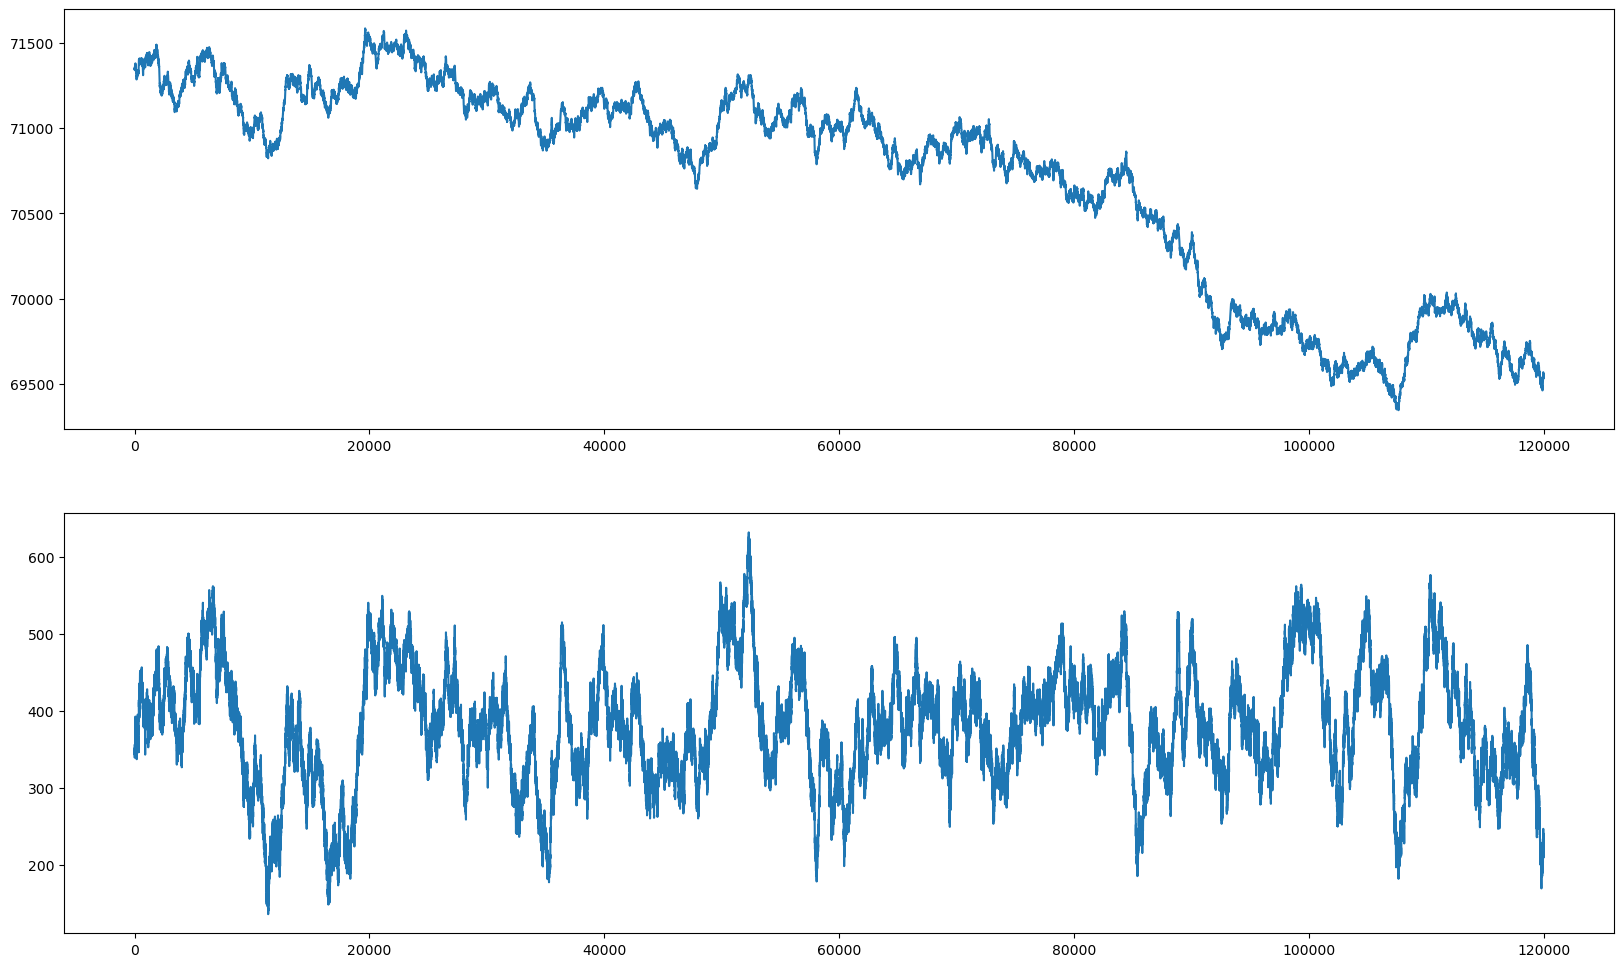

In [93]:
# plot
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(basket_prices['mid_price'], label='basket price')
axs[1].plot(combined_prices['spread'], label='spread')

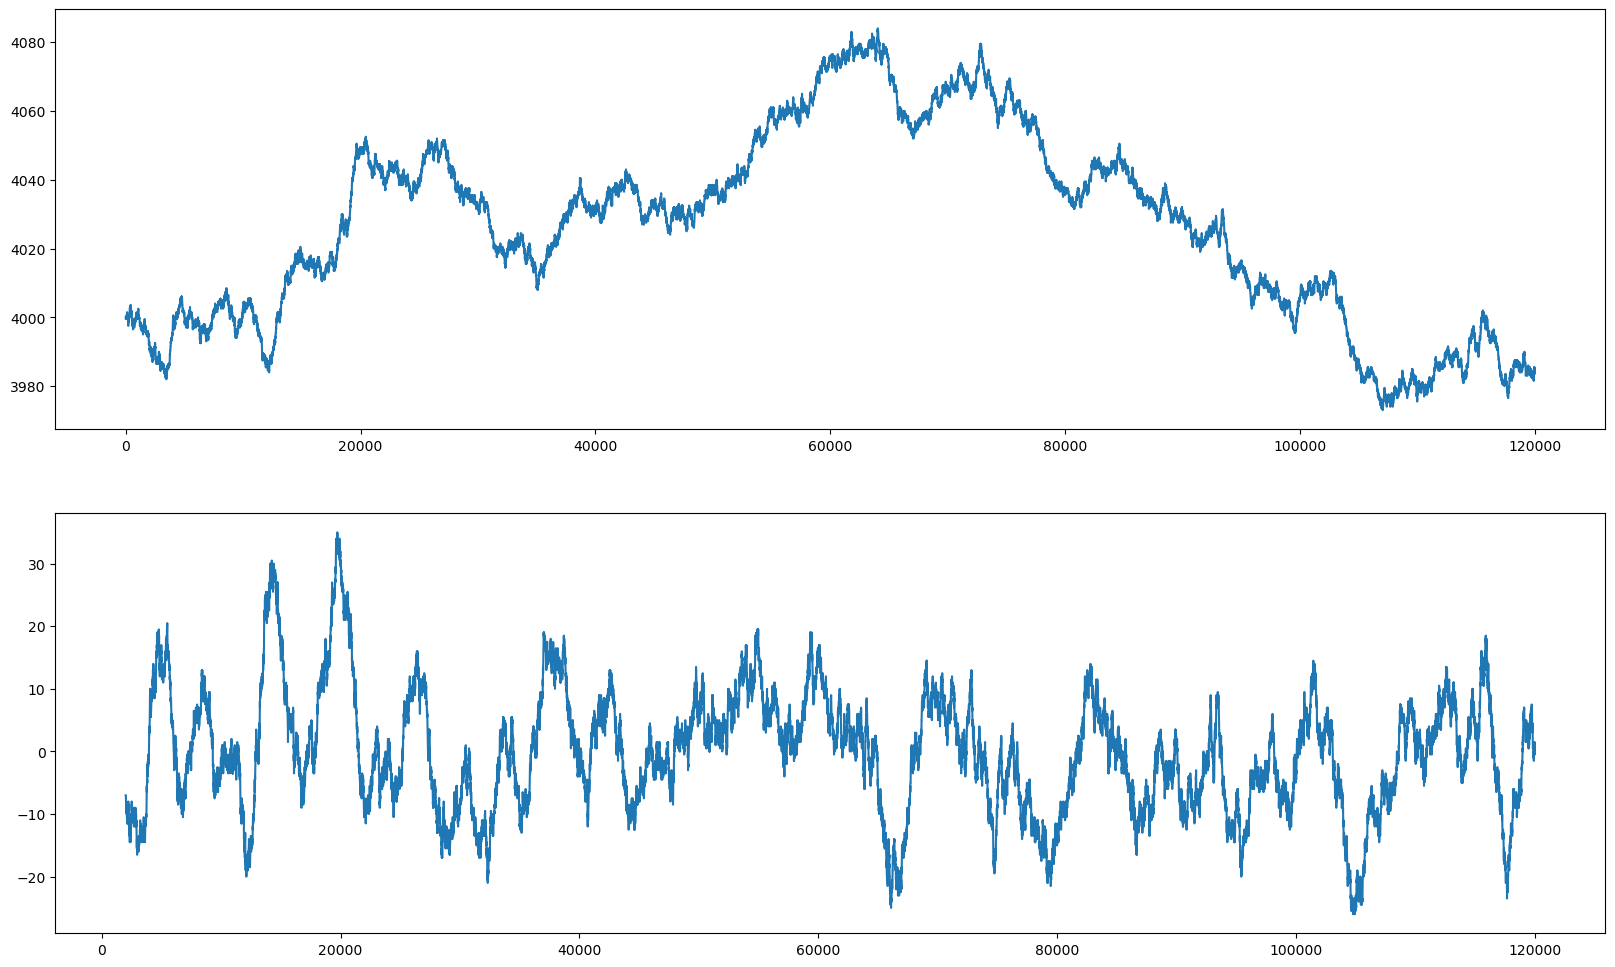

In [97]:
strawberry_diff = strawberry_mid_prices.diff(500)

# plot
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(strawberry_mid_prices, label='strawberry price')
axs[1].plot(strawberry_diff, label='strawberry derivative')

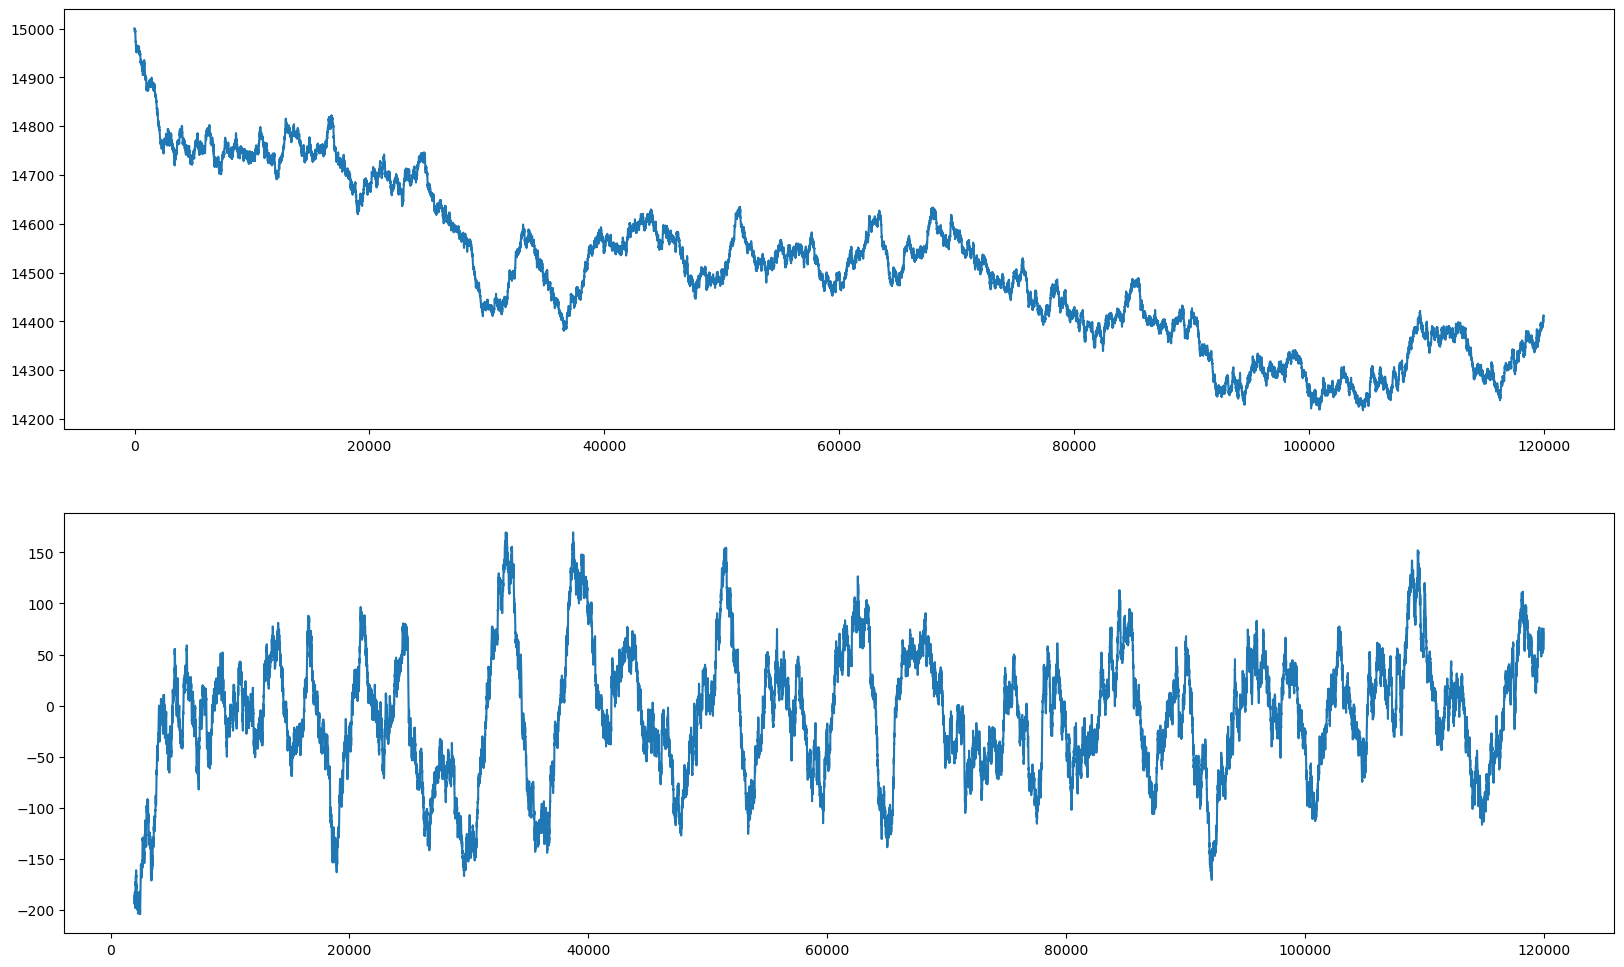

In [98]:
rose_diff = rose_mid_prices.diff(500)

# plot
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(rose_mid_prices, label='rose price')
axs[1].plot(rose_diff, label='rose derivative')

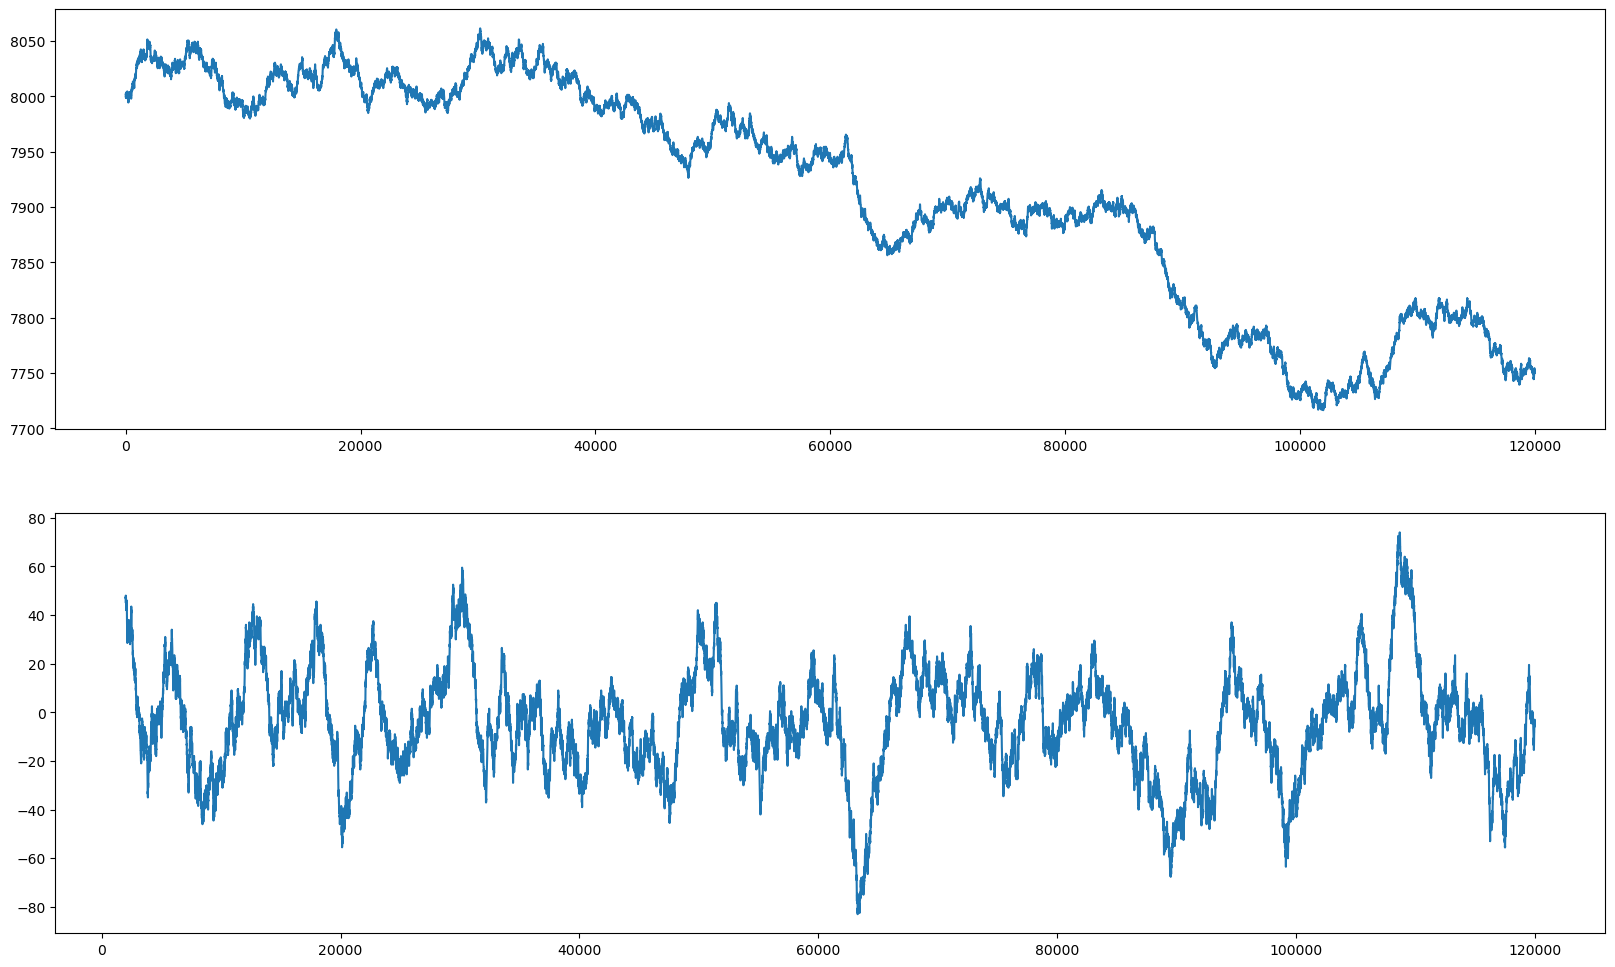

In [99]:
chocolate_diff = chocolate_mid_prices.diff(500)

# plot
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(chocolate_mid_prices, label='chocolate price')
axs[1].plot(chocolate_diff, label='chocolate derivative')